In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, fbeta_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, fbeta_score
from sklearn.utils.class_weight import compute_class_weight



In [1]:

df1=pd.read_csv("C:\\Users\\HP\\Downloads\\The Combined Dataset.csv")

In [2]:
df1.head()

,Type,Subcarrier Spacing,Symbol time,Subcarriers FFT,CP length,Average Received Power (mW),Threshold,SNR,Average Signal Power,Average Noise Power
0,Clean,976.562,0.001024,256,64,0.047229,0,16.4875,-18.9612,-35.4487
1,Clean,3906.250,0.000256,64,64,0.055409,0,16.7195,-19.0825,-35.8021
2,Clean,244.141,0.004096,1024,64,0.048449,0,13.5636,-18.8403,-32.4039
3,Clean,488.281,0.002048,512,64,0.194600,0,14.0490,-18.8097,-32.8587
4,Clean,488.281,0.002048,512,64,0.056610,0,14.4117,-18.9871,-33.3987


In [3]:
df1['Type'].value_counts()

Type
Clean      10071
Barrage     3392
Tone        3378
SP          3367
PA          3357
Name: count, dtype: int64

In [4]:
map_type={'Clean':0,'Barrage':1,'Tone':2,'SP':3,'PA':4}
df1['Type_encoded'] = df1['Type'].apply(lambda x: map_type.get(x, None))



In [5]:
df1.columns

Index(['Type', 'Subcarrier Spacing', 'Symbol time', 'Subcarriers FFT',
       'CP length', 'Average Received Power (mW)', 'Threshold', 'SNR',
       'Average Signal Power', 'Average Noise Power', 'Type_encoded'],
      dtype='object')

In [6]:

features = ['Subcarrier Spacing', 'Symbol time', 'Subcarriers FFT', 
            'CP length', 'Average Received Power (mW)', 'Threshold', 
            'SNR', 'Average Signal Power', 'Average Noise Power']


variance_df = df1[features + ['Type_encoded']].groupby('Type_encoded').var()





In [7]:
variance_df

,Subcarrier Spacing,Symbol time,Subcarriers FFT,CP length,Average Received Power (mW),Threshold,SNR,Average Signal Power,Average Noise Power
Type_encoded,,,,,,,,,
0,2.439999e+06,0.000002,111372.972276,183.198852,0.016166,0.004744,0.188940,0.577606,0.890365
1,2.280160e+06,0.000002,109654.769773,185.299355,1770.921598,0.000295,3.827817,2.084953,1.371137
2,1.811419e+07,0.000002,101548.749966,153.101244,2460.462215,0.004129,9.484862,1.816997,5.093089
3,1.148312e+06,0.000002,103061.673004,230.407642,24.997197,0.011162,0.532922,4.643903,6.453999
4,2.406066e+06,0.000002,113299.224430,183.535549,2660.725283,0.002675,2.372599,1.912775,0.477363


In [8]:
for c in df1.columns:
    if df1[c].dtype==float:
        print(df1[c].describe())

count    23565.000000
mean       983.824703
std       2144.936551
min        244.141000
25%        244.141000
50%        488.281000
75%        976.562000
max      15625.000000
Name: Subcarrier Spacing, dtype: float64
count    23565.000000
mean         0.002367
std          0.001321
min          0.000064
25%          0.001024
50%          0.002048
75%          0.004096
max          0.004096
Name: Symbol time, dtype: float64
count    23565.000000
mean       115.084816
std        134.678333
min          0.017780
25%          0.062552
50%          6.860290
75%        258.232000
max        408.954000
Name: Average Received Power (mW), dtype: float64
count    23565.000000
mean         8.707638
std          7.000611
min         -2.880890
25%          2.242910
50%          5.287220
75%         16.564400
max         20.242100
Name: SNR, dtype: float64
count    23565.000000
mean       -10.463105
std          8.267662
min        -19.842700
25%        -18.191300
50%        -13.468200
75%         -

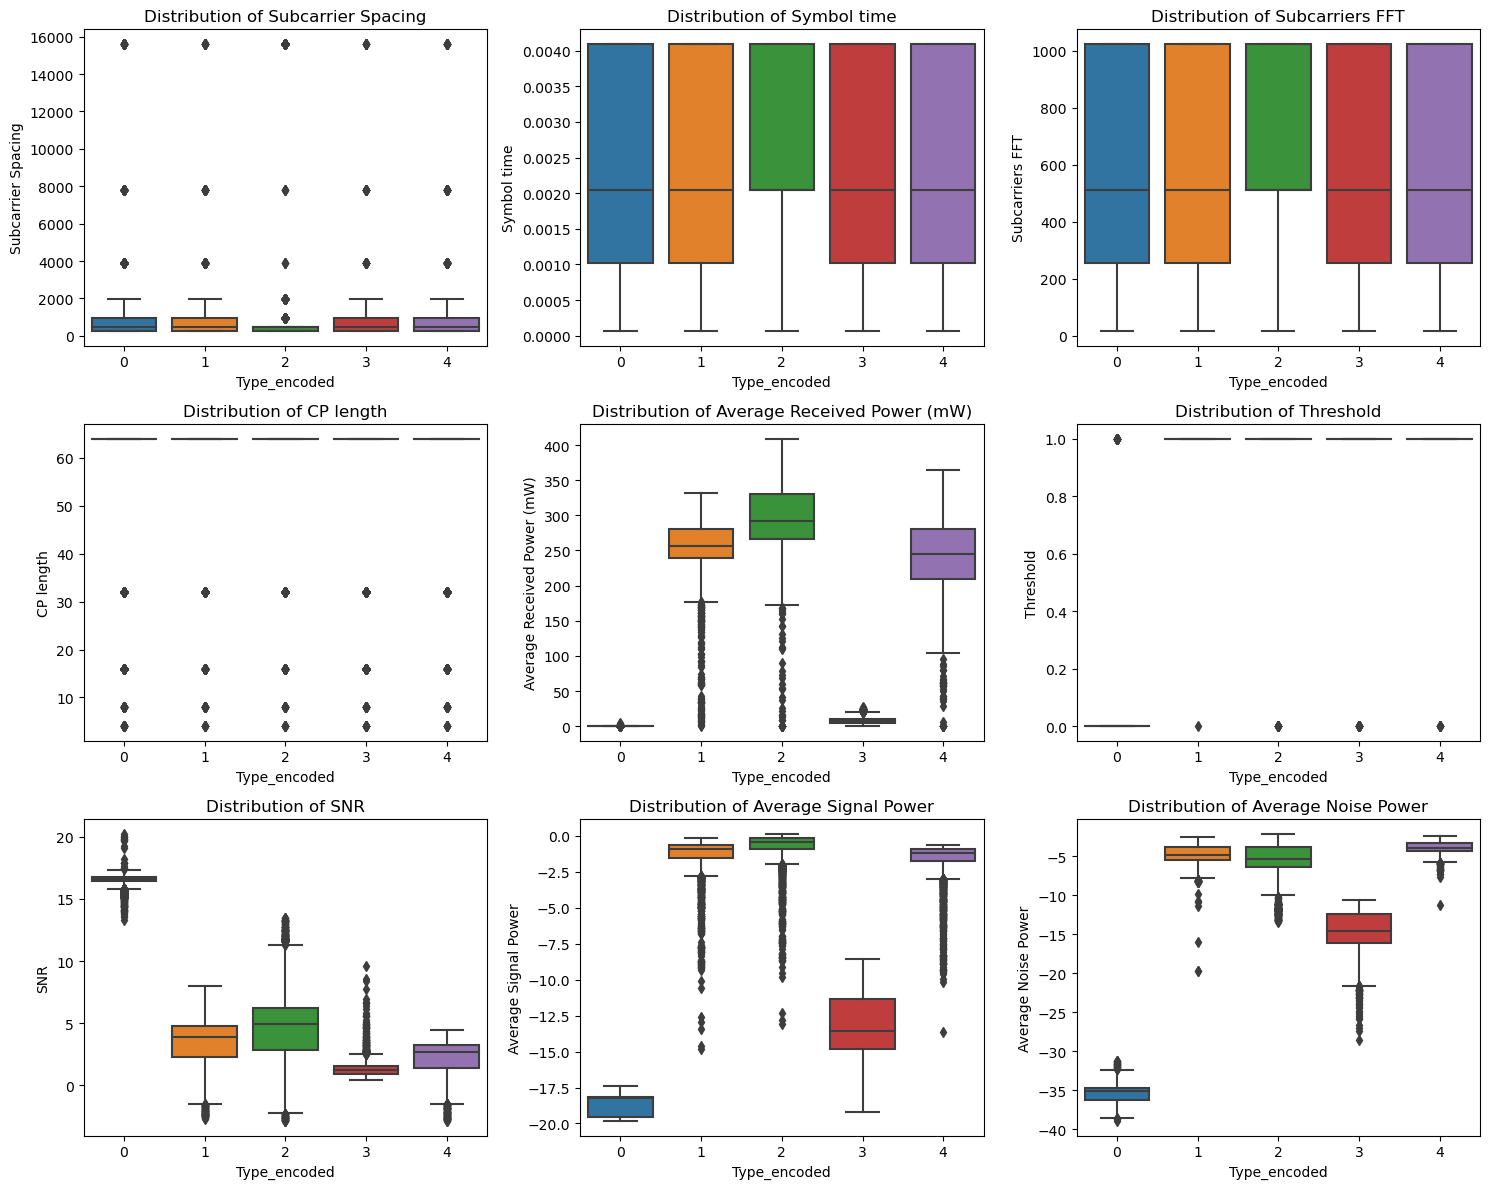

In [9]:


# List of features to plot
features = ['Subcarrier Spacing', 'Symbol time', 'Subcarriers FFT', 
            'CP length', 'Average Received Power (mW)', 'Threshold', 
            'SNR', 'Average Signal Power', 'Average Noise Power']

# Create a boxplot for each feature
plt.figure(figsize=(15, 12))  # Adjust the figure size for clarity

for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)  # Create a 3x3 grid of subplots
    sns.boxplot(x='Type_encoded', y=feature, data=df1)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Type_encoded')
    plt.ylabel(feature)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [10]:
df2=df1[df1['Subcarrier Spacing']>10000]

In [11]:
df2

,Type,Subcarrier Spacing,Symbol time,Subcarriers FFT,CP length,Average Received Power (mW),Threshold,SNR,Average Signal Power,Average Noise Power,Type_encoded
42,Clean,15625.0,0.000064,16,32,0.022928,0,16.246800,-19.53110,-35.77790,0
74,Clean,15625.0,0.000064,16,64,0.023501,0,16.636800,-19.64730,-36.28420,0
337,Clean,15625.0,0.000064,16,64,0.030893,0,16.215600,-19.80530,-36.02090,0
394,Clean,15625.0,0.000064,16,32,0.042212,0,16.425400,-19.83590,-36.26120,0
492,Clean,15625.0,0.000064,16,32,0.309053,0,16.459800,-19.80490,-36.26480,0
...,...,...,...,...,...,...,...,...,...,...,...
22989,PA,15625.0,0.000064,16,64,275.120000,1,3.493990,-1.07349,-4.56747,4
23173,PA,15625.0,0.000064,16,16,268.318000,1,0.976794,-1.89375,-2.87054,4
23179,PA,15625.0,0.000064,16,32,207.439000,1,1.274750,-1.79831,-3.07306,4
23184,PA,15625.0,0.000064,16,64,301.901000,1,1.506890,-1.60217,-3.10906,4


In [12]:
df2['Type_encoded'].value_counts()

Type_encoded
2    291
0     58
4     18
1     17
3      9
Name: count, dtype: int64

In [13]:
df3=df1[df1['SNR']>10]

In [14]:
df3

,Type,Subcarrier Spacing,Symbol time,Subcarriers FFT,CP length,Average Received Power (mW),Threshold,SNR,Average Signal Power,Average Noise Power,Type_encoded
0,Clean,976.562,0.001024,256,64,0.047229,0,16.4875,-18.961200,-35.4487,0
1,Clean,3906.250,0.000256,64,64,0.055409,0,16.7195,-19.082500,-35.8021,0
2,Clean,244.141,0.004096,1024,64,0.048449,0,13.5636,-18.840300,-32.4039,0
3,Clean,488.281,0.002048,512,64,0.194600,0,14.0490,-18.809700,-32.8587,0
4,Clean,488.281,0.002048,512,64,0.056610,0,14.4117,-18.987100,-33.3987,0
...,...,...,...,...,...,...,...,...,...,...,...
16202,Tone,15625.000,0.000064,16,64,210.170000,1,10.7972,-0.106738,-10.9039,2
16203,Tone,488.281,0.002048,512,64,216.709000,1,10.7406,-0.114460,-10.8551,2
16204,Tone,15625.000,0.000064,16,64,109.798000,1,10.4517,-0.145757,-10.5974,2
16205,Tone,15625.000,0.000064,16,64,72.892600,1,10.3169,-0.161664,-10.4786,2


In [15]:
df3['Type_encoded'].value_counts()

Type_encoded
0    10071
2      223
Name: count, dtype: int64

In [16]:
df1=df1[df1['Subcarrier Spacing']<10000]

In [17]:
df1

,Type,Subcarrier Spacing,Symbol time,Subcarriers FFT,CP length,Average Received Power (mW),Threshold,SNR,Average Signal Power,Average Noise Power,Type_encoded
0,Clean,976.562,0.001024,256,64,0.047229,0,16.48750,-18.961200,-35.44870,0
1,Clean,3906.250,0.000256,64,64,0.055409,0,16.71950,-19.082500,-35.80210,0
2,Clean,244.141,0.004096,1024,64,0.048449,0,13.56360,-18.840300,-32.40390,0
3,Clean,488.281,0.002048,512,64,0.194600,0,14.04900,-18.809700,-32.85870,0
4,Clean,488.281,0.002048,512,64,0.056610,0,14.41170,-18.987100,-33.39870,0
...,...,...,...,...,...,...,...,...,...,...,...
23560,PA,244.141,0.004096,1024,64,296.956000,1,3.77551,-0.979870,-4.75538,4
23561,PA,976.562,0.001024,256,32,328.213000,1,3.79420,-0.967789,-4.76199,4
23562,PA,244.141,0.004096,1024,64,245.569000,1,3.78316,-0.967134,-4.75029,4
23563,PA,244.141,0.004096,1024,64,218.123000,1,3.77739,-0.968114,-4.74551,4


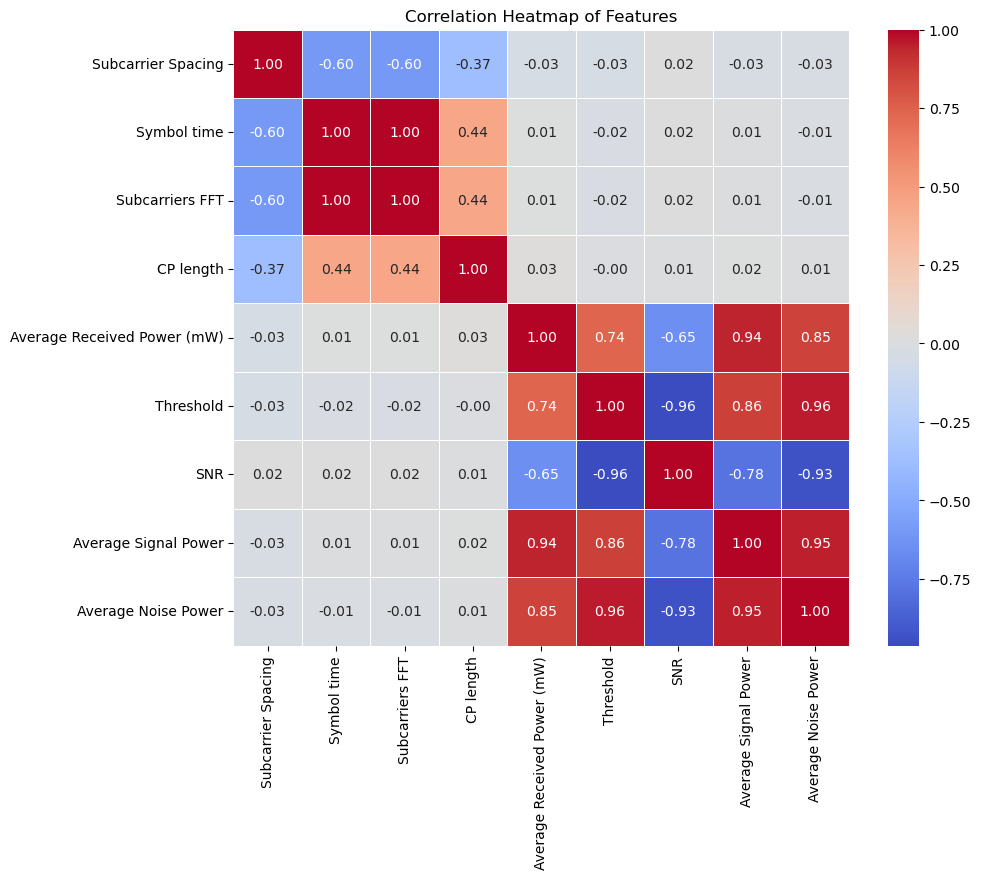

In [18]:
# List of features to calculate correlation among
features = ['Subcarrier Spacing', 'Symbol time', 'Subcarriers FFT', 
            'CP length', 'Average Received Power (mW)', 'Threshold', 
            'SNR', 'Average Signal Power', 'Average Noise Power']

# Calculate the correlation matrix for the selected features
corr_matrix = df1[features].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            cbar=True, linewidths=0.5, square=True, xticklabels=features, yticklabels=features)

# Set title and labels
plt.title('Correlation Heatmap of Features')
plt.show()


In [19]:
df1.drop(columns='Type',axis=1,inplace=True)

In [20]:
df1.columns

Index(['Subcarrier Spacing', 'Symbol time', 'Subcarriers FFT', 'CP length',
       'Average Received Power (mW)', 'Threshold', 'SNR',
       'Average Signal Power', 'Average Noise Power', 'Type_encoded'],
      dtype='object')

In [21]:
X=df1.drop(columns='Type_encoded',axis=1)
y=df1['Type_encoded']

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:43:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3004
           1       0.84      0.85      0.84      1013
           2       0.95      0.88      0.91       926
           3       1.00      1.00      1.00      1007
           4       0.81      0.84      0.82      1002

    accuracy                           0.94      6952
   macro avg       0.92      0.91      0.92      6952
weighted avg       0.94      0.94      0.94      6952

F2 Score: 0.939686338545569
Feature Importances:
Subcarrier Spacing: 0.0187
Symbol time: 0.0000
Subcarriers FFT: 0.0000
CP length: 0.0099
Average Received Power (mW): 0.0895
Threshold: 0.0000
SNR: 0.3533
Average Signal Power: 0.1353
Average Noise Power: 0.3934


<Figure size 1000x600 with 0 Axes>

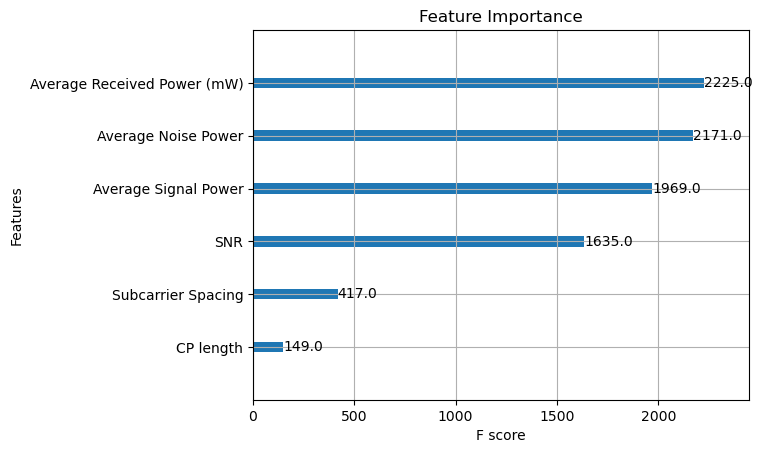

In [26]:


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Train an XGBoost classifier
model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# F2 score
f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')
print(f"F2 Score: {f2}")

# Feature importance
print("Feature Importances:")
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f"{feature}: {importance:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(model, max_num_features=10)  # Plot top 10 important features
plt.title("Feature Importance")
plt.show()


In [27]:


# List of columns to drop
columns_to_drop = ['Average Signal Power', 'Threshold','Type_encoded']

# Create X1 by dropping the specified columns
X1 = df1.drop(columns=columns_to_drop)
y = df1['Type_encoded']

# Stratified split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, stratify=y, random_state=42)

# Train an XGBoost classifier
model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# F2 score
f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')
print(f"F2 Score: {f2}")


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:43:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3004
           1       0.84      0.81      0.82      1013
           2       0.93      0.87      0.90       926
           3       1.00      1.00      1.00      1007
           4       0.78      0.85      0.81      1002

    accuracy                           0.93      6952
   macro avg       0.91      0.91      0.91      6952
weighted avg       0.94      0.93      0.93      6952

F2 Score: 0.933903986823601


In [28]:
columns_to_drop = ['Symbol time', 'Subcarriers FFT', 'Threshold','Type_encoded']

# Create X1 by dropping the specified columns
X2 = df1.drop(columns=columns_to_drop)
y = df1['Type_encoded']

# Stratified split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, stratify=y, random_state=42)

# Train an XGBoost classifier
model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# F2 score
f2 = fbeta_score(y_test, y_pred, beta=2, average='weighted')
print(f"F2 Score: {f2}")


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:43:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3004
           1       0.84      0.85      0.84      1013
           2       0.95      0.88      0.91       926
           3       1.00      1.00      1.00      1007
           4       0.81      0.84      0.82      1002

    accuracy                           0.94      6952
   macro avg       0.92      0.91      0.92      6952
weighted avg       0.94      0.94      0.94      6952

F2 Score: 0.939686338545569


In [29]:
import numpy as np
import pandas as pd

# Calculate the correlation matrix
corr_matrix = df1[features].corr().abs()

# Select upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find pairs with correlation greater than 0.9
high_corr_pairs = [(col, row, upper_triangle.loc[row, col]) 
                   for col in upper_triangle.columns for row in upper_triangle.index 
                   if not pd.isna(upper_triangle.loc[row, col]) and upper_triangle.loc[row, col] > 0.9]

# Display pairs with high correlation
for pair in high_corr_pairs:
    print(f"Features: {pair[0]} and {pair[1]} - Correlation: {pair[2]:.2f}")


Features: Subcarriers FFT and Symbol time - Correlation: 1.00
Features: SNR and Threshold - Correlation: 0.96
Features: Average Signal Power and Average Received Power (mW) - Correlation: 0.94
Features: Average Noise Power and Threshold - Correlation: 0.96
Features: Average Noise Power and SNR - Correlation: 0.93
Features: Average Noise Power and Average Signal Power - Correlation: 0.95


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


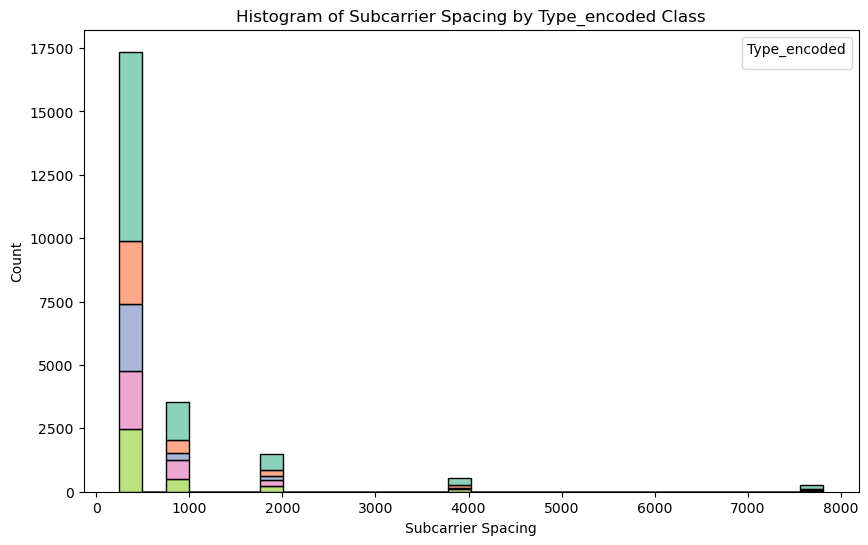

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


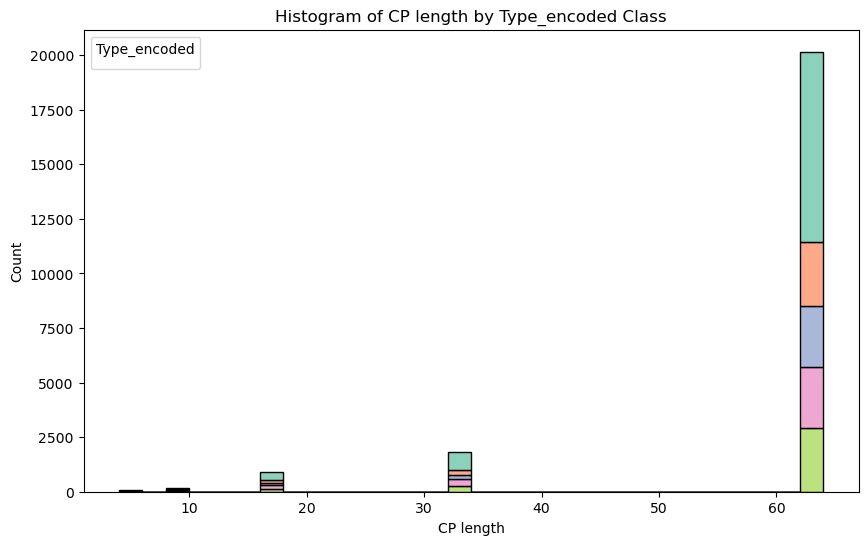

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


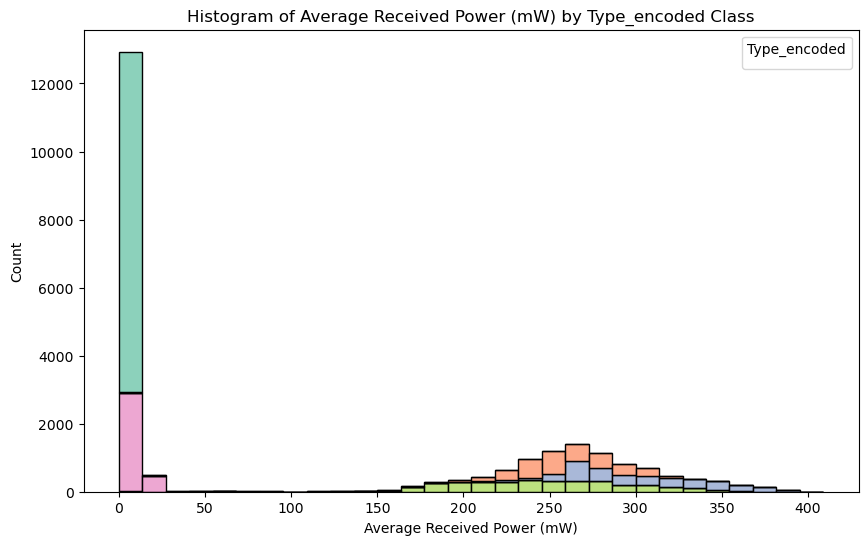

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


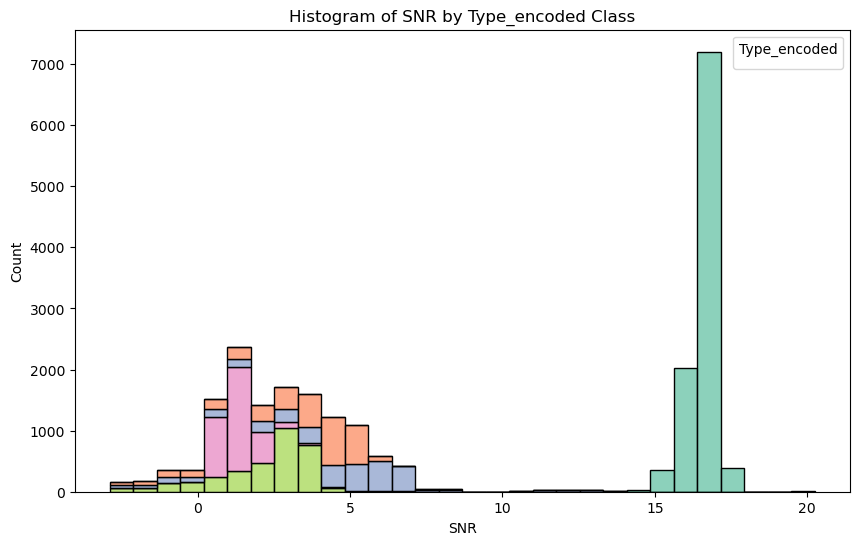

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


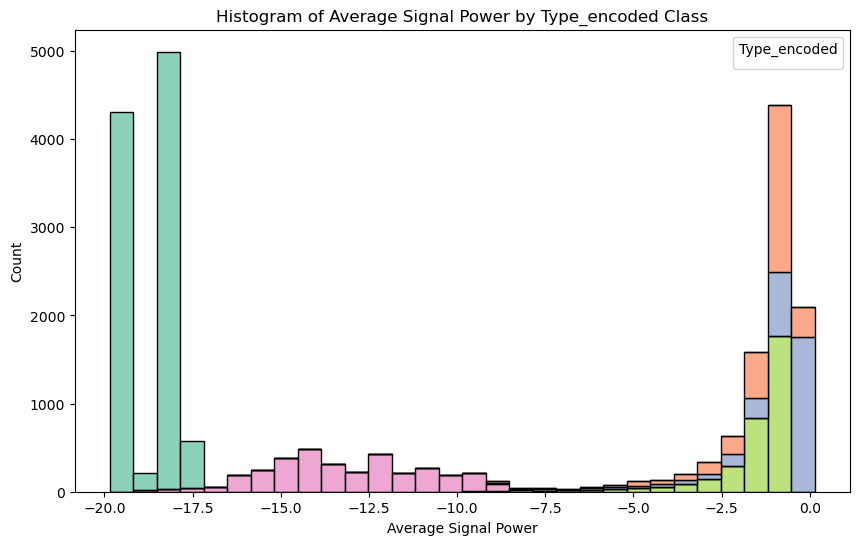

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


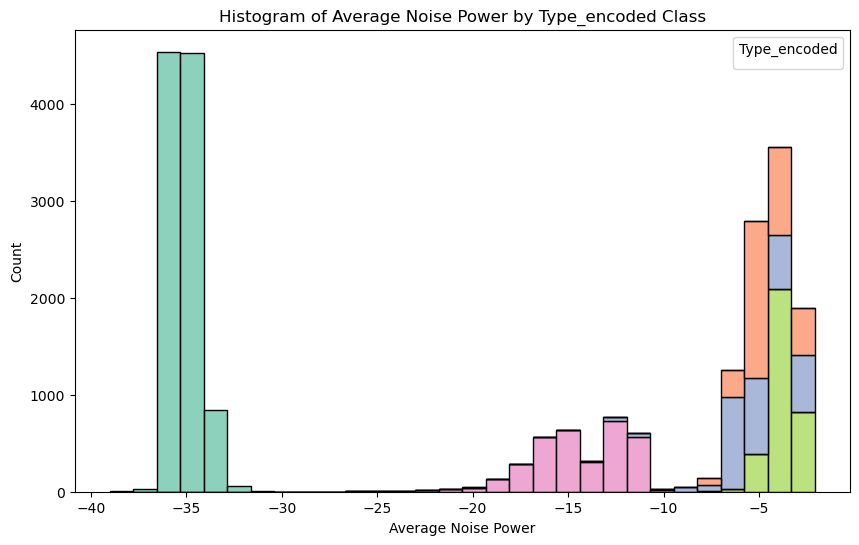

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each feature in X2
for feature in X2.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df1, x=feature, hue='Type_encoded', multiple='stack', kde=False, palette='Set2', bins=30)
    
    # Set titles and labels
    plt.title(f"Histogram of {feature} by Type_encoded Class")
    plt.xlabel(feature)
    plt.ylabel("Count")
    
    # Show the plot
    plt.legend(title='Type_encoded')
    plt.show()


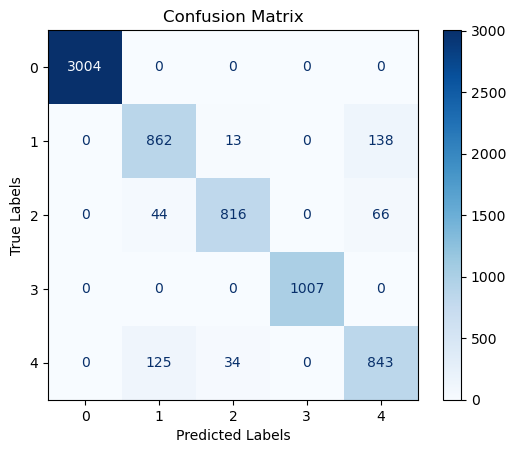

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [32]:
columns_to_drop = ['Symbol time', 'Subcarriers FFT', 'Threshold','Type_encoded']

# Create X1 by dropping the specified columns
X2 = df1.drop(columns=columns_to_drop)
y = df1['Type_encoded']

# Stratified split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, stratify=y, random_state=42)

# Calculate balanced weights for each class in y_train
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
weights = np.array([class_weights[label] for label in y_train])

# Initialize and train the XGBoost model with sample weights
model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
model.fit(X_train, y_train, sample_weight=weights)

# Make predictions
y_pred = model.predict(X_test)

# Classification report and F2 score
from sklearn.metrics import classification_report, fbeta_score

print("Classification Report:")
print(classification_report(y_test, y_pred))

f2_score = fbeta_score(y_test, y_pred, beta=2, average='weighted')
print(f"F2 Score: {f2_score}")


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:43:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3004
           1       0.83      0.85      0.84      1013
           2       0.95      0.89      0.92       926
           3       1.00      1.00      1.00      1007
           4       0.81      0.84      0.82      1002

    accuracy                           0.94      6952
   macro avg       0.92      0.92      0.92      6952
weighted avg       0.94      0.94      0.94      6952

F2 Score: 0.9404107583928094


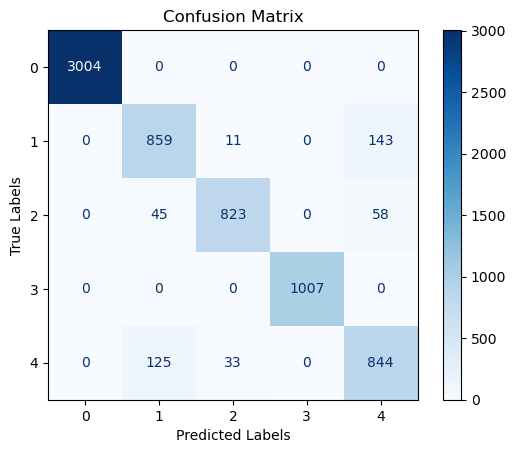

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [34]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, fbeta_score, accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Drop specified columns
columns_to_drop = ['Symbol time', 'Subcarriers FFT', 'Threshold','Type_encoded']
X2 = df1.drop(columns=columns_to_drop)
y = df1['Type_encoded']

# Stratified split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, stratify=y, random_state=42)

# Calculate balanced weights for each class in y_train
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
weights = np.array([class_weights[label] for label in y_train])

# Define eta values to test
eta_values = [0.5, 0.55, 0.6, 0.65]

# Evaluate model for each eta
for eta in eta_values:
    print(f"\nEvaluating model with eta = {eta}")
    
    # Initialize XGBoost model with current eta
    model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, learning_rate=eta)
    
    # Train the model with sample weights
    model.fit(X_train, y_train, sample_weight=weights)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and F2 score
    accuracy = accuracy_score(y_test, y_pred)
    f2_score_value = fbeta_score(y_test, y_pred, beta=2, average='weighted')
    
    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F2 Score: {f2_score_value:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



Evaluating model with eta = 0.5


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:43:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9419
F2 Score: 0.9420
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3004
           1       0.84      0.86      0.85      1013
           2       0.95      0.89      0.92       926
           3       1.00      1.00      1.00      1007
           4       0.81      0.85      0.83      1002

    accuracy                           0.94      6952
   macro avg       0.92      0.92      0.92      6952
weighted avg       0.94      0.94      0.94      6952


Evaluating model with eta = 0.55


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:43:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9413
F2 Score: 0.9414
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3004
           1       0.85      0.85      0.85      1013
           2       0.94      0.89      0.91       926
           3       1.00      1.00      1.00      1007
           4       0.81      0.85      0.83      1002

    accuracy                           0.94      6952
   macro avg       0.92      0.92      0.92      6952
weighted avg       0.94      0.94      0.94      6952


Evaluating model with eta = 0.6


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:43:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9428
F2 Score: 0.9428
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3004
           1       0.85      0.85      0.85      1013
           2       0.94      0.89      0.92       926
           3       1.00      1.00      1.00      1007
           4       0.81      0.85      0.83      1002

    accuracy                           0.94      6952
   macro avg       0.92      0.92      0.92      6952
weighted avg       0.94      0.94      0.94      6952


Evaluating model with eta = 0.65


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:43:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9403
F2 Score: 0.9404
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3004
           1       0.84      0.85      0.84      1013
           2       0.94      0.89      0.92       926
           3       1.00      1.00      1.00      1007
           4       0.81      0.84      0.82      1002

    accuracy                           0.94      6952
   macro avg       0.92      0.92      0.92      6952
weighted avg       0.94      0.94      0.94      6952



In [35]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, fbeta_score, accuracy_score
import numpy as np
from sklearn.utils.class_weight import compute_class_weight


# Calculate balanced weights for each class in y_train
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
weights = np.array([class_weights[label] for label in y_train])

# Initialize the LightGBM classifier
model = lgb.LGBMClassifier(objective='multiclass', class_weight='balanced', random_state=42)

# Train the model with sample weights
model.fit(X_train, y_train, sample_weight=weights)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy and F2 score
accuracy = accuracy_score(y_test, y_pred)
f2_score_value = fbeta_score(y_test, y_pred, beta=2, average='weighted')

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"F2 Score: {f2_score_value:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1033
[LightGBM] [Info] Number of data points in the train set: 16220, number of used features: 6
[LightGBM] [Info] Start training from score -2.579553
[LightGBM] [Info] Start training from score -1.491866
[LightGBM] [Info] Start training from score -1.402929
[LightGBM] [Info] Start training from score -1.487198
[LightGBM] [Info] Start training from score -1.481226
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 0.9380
F2 Score: 0.9381
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00   

In [36]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
columns_to_drop = ['Symbol time', 'Subcarriers FFT', 'Threshold','Type_encoded']

# Create X1 by dropping the specified columns
X2 = df1.drop(columns=columns_to_drop)
y = df1['Type_encoded']

# Stratified split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, stratify=y, random_state=42)

# Calculate balanced weights for each class in y_train
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
weights = np.array([class_weights[label] for label in y_train])

# Initialize and train the XGBoost model with sample weights
model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
model.fit(X_train, y_train, sample_weight=weights)

# Make predictions
y_pred = model.predict(X_test)

# Classification report and F2 score
from sklearn.metrics import classification_report, fbeta_score

print("Classification Report:")
print(classification_report(y_test, y_pred))

f2_score = fbeta_score(y_test, y_pred, beta=2, average='weighted')
print(f"F2 Score: {f2_score}")


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:43:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3004
           1       0.83      0.85      0.84      1013
           2       0.95      0.89      0.92       926
           3       1.00      1.00      1.00      1007
           4       0.81      0.84      0.82      1002

    accuracy                           0.94      6952
   macro avg       0.92      0.92      0.92      6952
weighted avg       0.94      0.94      0.94      6952

F2 Score: 0.9404107583928094
